# Data Preparation and Customer Analysis Python Notebook

Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

### Examine transaction data
* insconsistencies?
* null data?
* numeric data?
* clean data is a must
* merge the data
* Its then time to analyse

### Data to look at and metrics to define
* total sales
* drivers of sales
* highest sales come from

### To do
* charts
* graphs
* interesting trends?

### To find through the data
* Which customer segments to target?
* Chips packet size
* Over conclusion based on analysis

## Task 1:
## 1. Problem
Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

## 2. Data
Data provided by Inside Sherpa and Quantium

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# QVI_purchase_behavior dataset
purchase_behavior = pd.read_csv("purchase_behaviour.csv")
purchase_behavior.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
# QVI_transaction_data dataset
transaction_data = pd.read_csv("qvi_transaction_data.csv")
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6
1,5/14/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6
2,5/20/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,3
3,8/17/2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15
4,8/18/2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,14


In [4]:
# Groupby DATE needed, so finding the length of DATE to see if groupby worked later
len(transaction_data["DATE"])

264836

In [5]:
# Creating new date frame with total sales grouped by date
date_sales = transaction_data["TOT_SALES"].groupby(transaction_data["DATE"])
print(date_sales.sum())

DATE
1/1/2019     5023
1/10/2019    5315
1/11/2019    5036
1/12/2019    5344
1/13/2019    5108
             ... 
9/5/2018     5524
9/6/2018     5863
9/7/2018     5189
9/8/2018     5346
9/9/2018     5596
Name: TOT_SALES, Length: 364, dtype: int64


In [6]:
# Data frame
date_sales_df = pd.DataFrame(date_sales.sum())
date_sales_df.head()

,TOT_SALES
DATE,
1/1/2019,5023
1/10/2019,5315
1/11/2019,5036
1/12/2019,5344
1/13/2019,5108


In [7]:
# Changing the PROD_NAME column to only display numbers that represent the package size
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.replace(r'[^\d.]+', '')

# Total sales grouped by PROD_NAME
new_sales = transaction_data["TOT_SALES"].astype(int).groupby(transaction_data["PROD_NAME"].rename("Package Size").astype(int))
# Total Sales mean by package size
#print(new_sales.mean())

In [8]:
# Data Frame new_sales.mean
df_sales = pd.DataFrame(new_sales.mean())
df_sales.head()

,TOT_SALES
Package Size,
70,4.674187
90,2.906915
110,7.649529
125,3.756534
134,6.749143


In [9]:
# Total sales grouped by store number
store_sales = transaction_data["TOT_SALES"].astype(int).groupby(transaction_data["STORE_NBR"].astype(int))
print(store_sales.sum())

STORE_NBR
1       2425
2       2043
3      12790
4      14658
5       9459
       ...  
268     2629
269    11212
270    11247
271     9692
272     4646
Name: TOT_SALES, Length: 272, dtype: int32


In [10]:
store_sales = pd.DataFrame(store_sales.sum())
store_sales.head()

,TOT_SALES
STORE_NBR,
1,2425
2,2043
3,12790
4,14658
5,9459


## 3. Visualizations

QVI_purchase_behavior dataset

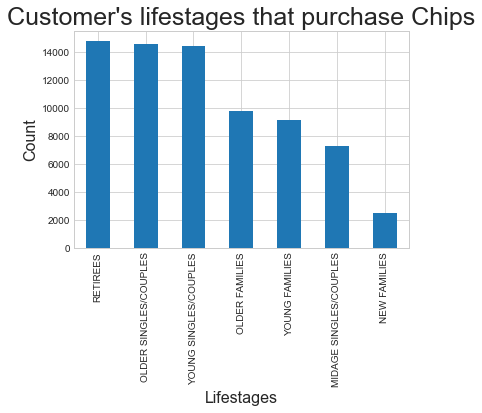

In [11]:
# Customer of Chips' Lifestages

# Using seaborn-whitegrid
plt.style.use("seaborn-whitegrid")

# Bar plot
fig, ax = plt.subplots()
purchase_behavior['LIFESTAGE'].value_counts().plot(kind='bar');
ax.set(title = "Customer's lifestages that purchase Chips",
      xlabel = "Lifestages",
      ylabel = "Count");
ax.title.set_size(25);
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16);

In [12]:
fig.savefig("Lifestages-and-purchases.png")

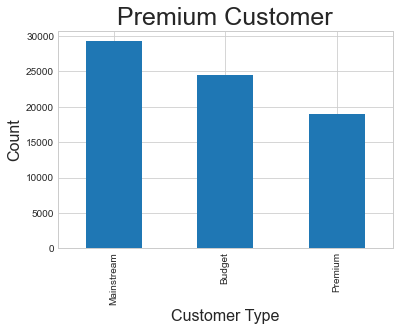

In [13]:
# Premium Customer
fig, ax = plt.subplots()
purchase_behavior["PREMIUM_CUSTOMER"].value_counts().plot(kind = "bar");
ax.set(title = "Premium Customer",
      xlabel = "Customer Type",
      ylabel = "Count");
ax.title.set_size(25)
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16);

In [14]:
fig.savefig("Premium-customer.png")

Done with QVI_purchase_behavior dataset

QVI_transaction_data dataset

In [15]:
# Change Style
plt.style.use('seaborn-white')

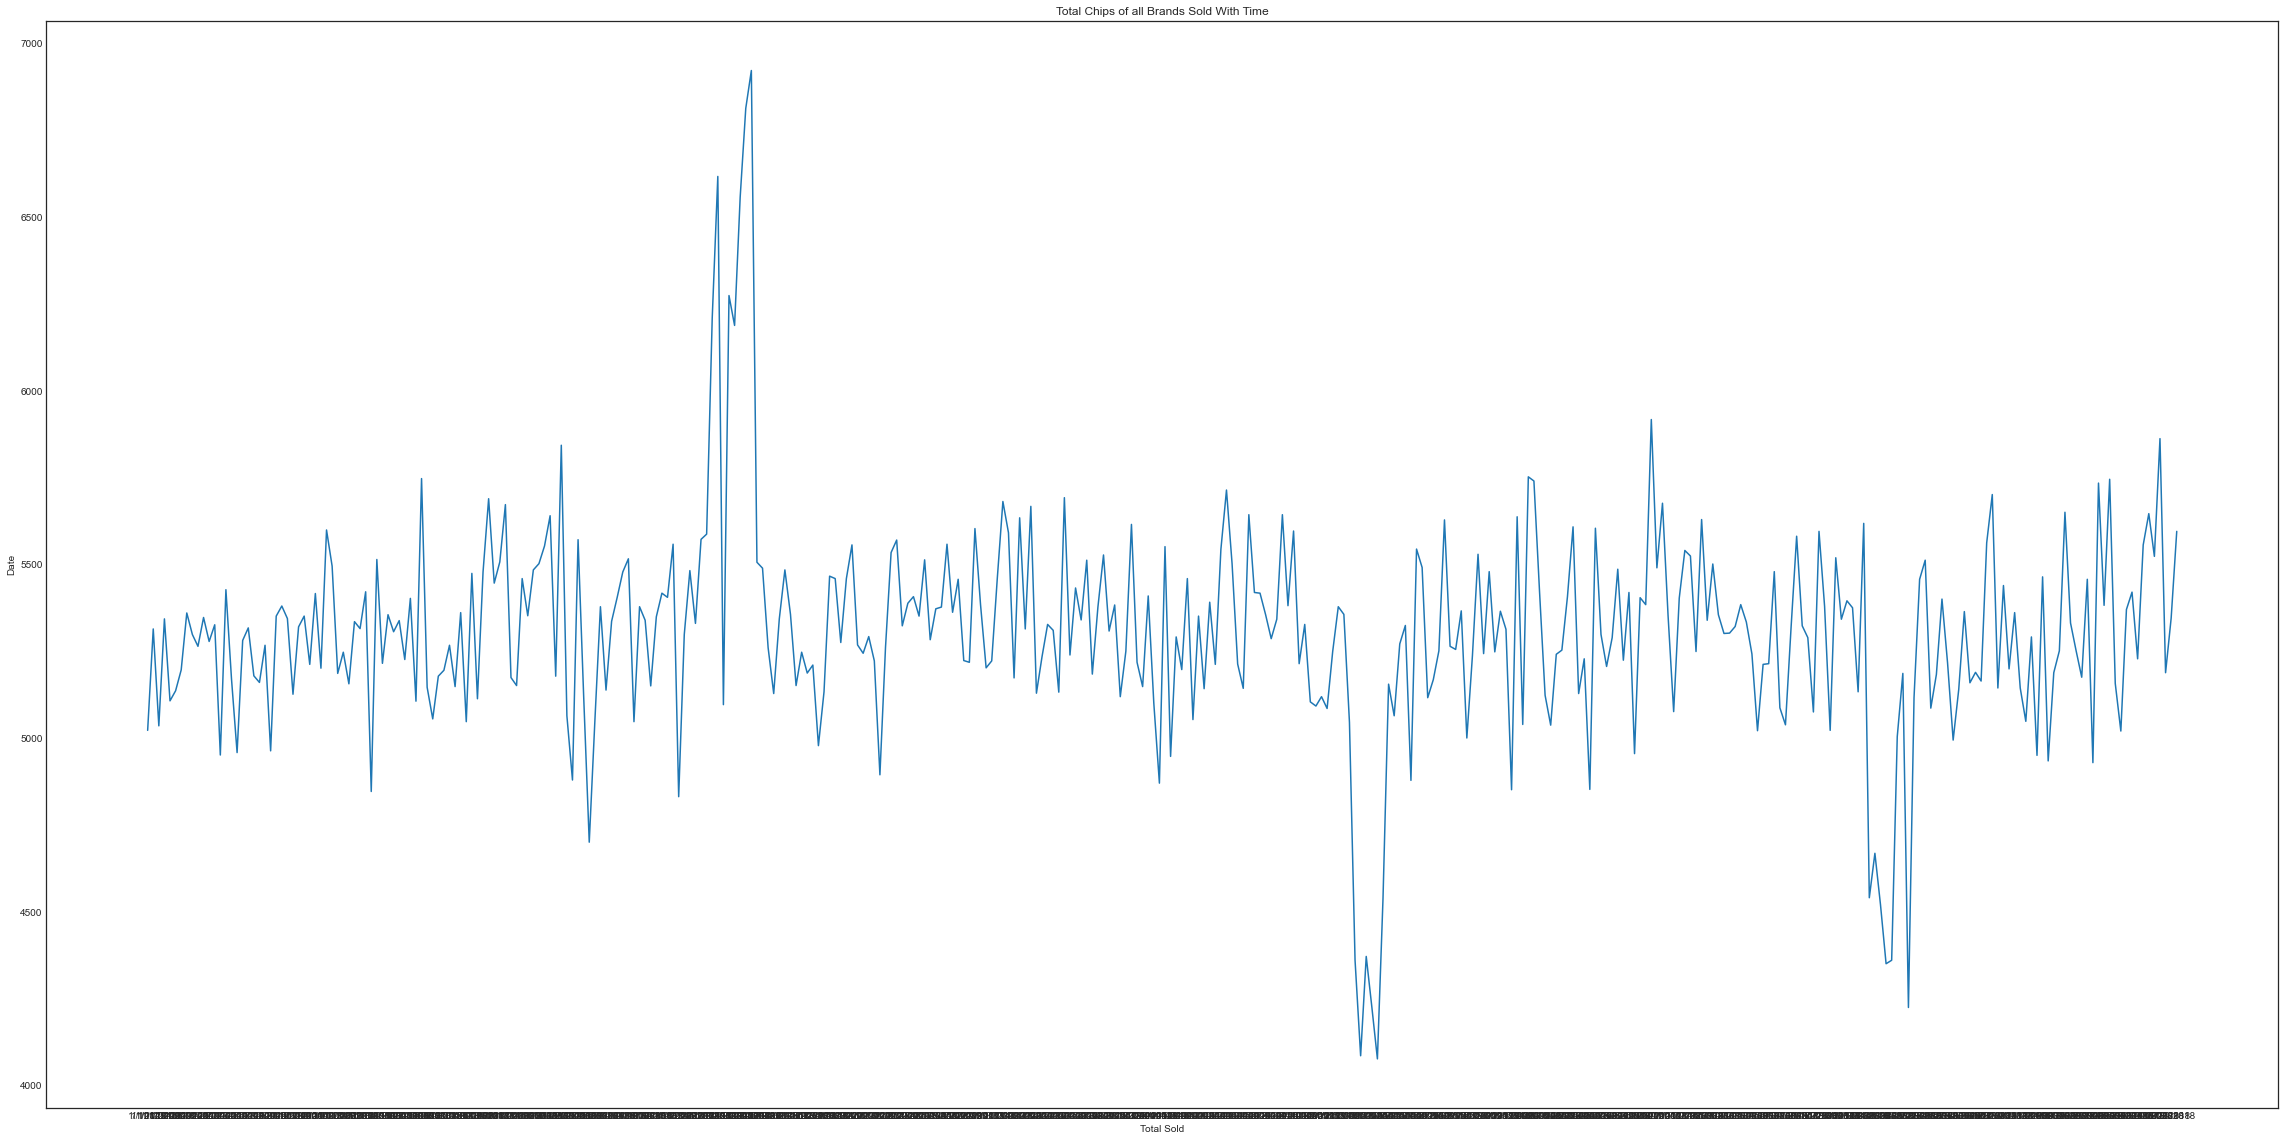

In [16]:
# total sales of chips from all stores and all brands as time passed
fig, ax = plt.subplots(figsize = (40,20))
ax.plot(date_sales_df);
ax.set(title = "Total Chips of all Brands Sold With Time",
      xlabel = "Total Sold",
      ylabel = "Date");
ax.title.set_size = (50)
ax.xaxis.label.set_size = (20)
ax.yaxis.label.set_size = (20);

In [17]:
fig.savefig("Total-chips-sold-reference-time.png")

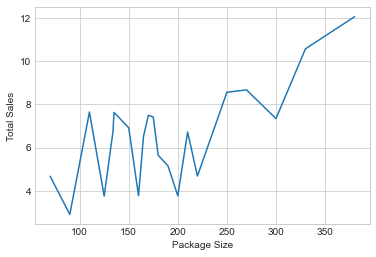

In [18]:
# Mean sold by package size plot
plt.style.use('seaborn-whitegrid')
plt.plot(df_sales);
plt.rcParams["figure.figsize"] = [5,30]
plt.xlabel('Package Size')
plt.ylabel('Total Sales');

In [19]:
fig.savefig("Package-size-total-sales.png")

In [20]:
df_sales.loc[df_sales['TOT_SALES'].idxmax()]

TOT_SALES    12.064194
Name: 380, dtype: float64

package size 380 grams is most sold chips package size

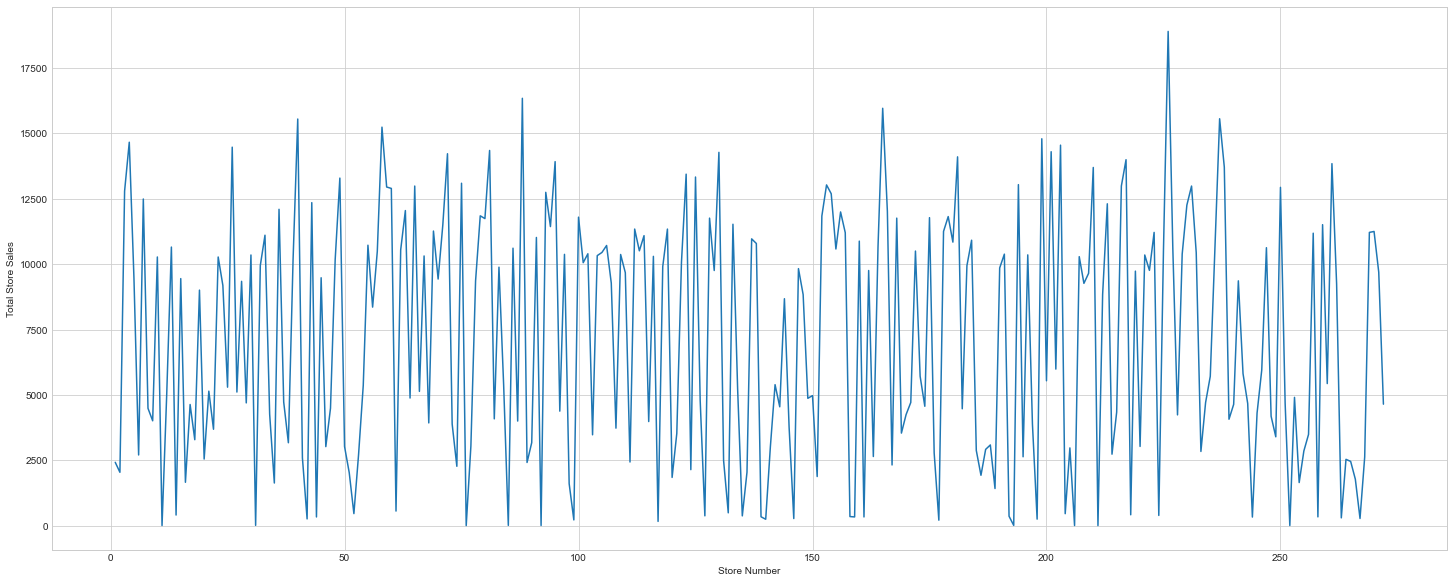

In [24]:
plt.plot(store_sales);
plt.rcParams["figure.figsize"] = [25,10];
plt.xlabel('Store Number')
plt.ylabel('Total Store Sales');

In [25]:
fig.savefig("Store-with-the-most-sales.png")

In [26]:
store_sales.loc[store_sales['TOT_SALES'].idxmax()]

TOT_SALES    18893
Name: 226, dtype: int32

Store 226 had the most number of chip sales over the time period

Done with QVI_transaction_data dataset